# Setup Environment

## Load Python Modules

In [1]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_recall_fscore_support
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
import torch
import matplotlib.pyplot as plt
import os
from image import *
from CNN import *
import util
%load_ext autoreload
%autoreload 2

## Show NVIDIA GPU

In [2]:
!nvidia-smi -L

GPU 0: NVIDIA H200 (UUID: GPU-d119ed05-cbc9-f73f-9593-da552101ea8e)
GPU 1: NVIDIA H200 (UUID: GPU-b4d355db-8c20-cdea-76b3-037c2a6fd13a)


## Setup utility

In [3]:
util.setup_logger()

# Load and Process Dataset

## Load Dataset

In [4]:
folder_path = os.path.join(os.getenv("HOME"), "scratch")
train_dataset = ImageDataset(os.path.join(folder_path, "train_80p.csv"), use_augmentation=False)
valid_dataset = ImageDataset(os.path.join(folder_path, "validation_10p.csv"), use_augmentation=False)
test_dataset  = ImageDataset(os.path.join(folder_path, "test_10p.csv"), use_augmentation=False)

## Check Dataset

In [5]:
train_dataset.check()

There are 0 missing values
31980 images with label 0, and 31980 with label 1.
All filenames end with .jpg


## (Optional) Show image for verification

Label: 0, shape: torch.Size([3, 512, 768])


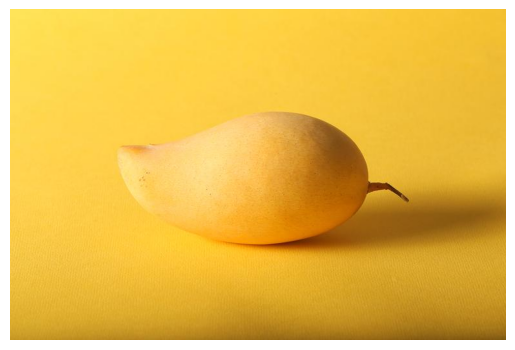

Label: 1, shape: torch.Size([3, 512, 768])


In [11]:
train_dataset.show_image()

## (Optional) Show normalized images

Label: 0, shape: torch.Size([3, 512, 768])
[WARNING] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.2208407..0.7783606].


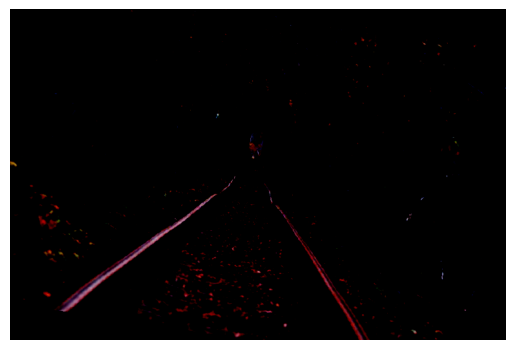

Label: 1, shape: torch.Size([3, 512, 768])
[WARNING] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.2509835..1.5361458].


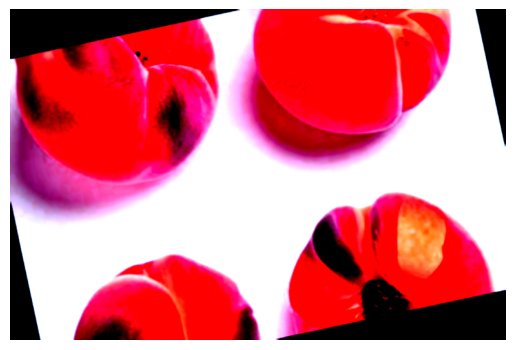

In [8]:
dataset.show_image(transform=True)

# CNN Model

## Create Torch Data Loaders

In [6]:
# train_loader, valid_loader, test_loader = dataset.get_loaders()
train_loader = train_dataset.get_loader()
valid_loader = valid_dataset.get_loader()
test_loader  = test_dataset.get_loader()

## Check CUDA Availability

In [7]:
# "cuda" only when GPUs are available.
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


## Training Setup

In [8]:
_exp_name = "CNN3"
# The number of training epochs and patience.
n_epochs = 100
patience = 30 # If no improvement in 'patience' epochs, early stop

# Initialize a model, and put it on the device specified.
model, train_losses, valid_losses = try_load_model(_exp_name)
if model == None:
    model = Classifier().to(device)

# For the classification task, we use cross-entropy as the measurement of performance.
criterion = nn.CrossEntropyLoss()

# Initialize optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=0.003, weight_decay=1e-5)

## Training

In [ ]:
train_model(model, optimizer, train_loader, valid_loader, n_epochs=n_epochs, patience=patience,
            criterion=nn.CrossEntropyLoss(), train_losses = train_losses, valid_losses = valid_losses,
            prefix = _exp_name)

100%|██████████| 1999/1999 [21:26<00:00,  1.55it/s]


[ Train | 001/100 ] loss = 0.36014, acc = 0.86166


100%|██████████| 250/250 [02:27<00:00,  1.69it/s]


[ Valid | 001/100 ] loss = 0.29532, acc = 0.88991
[ Valid | 001/100 ] loss = 0.29532, acc = 0.88991 -> best
Epoch 1 duration: 1434.40 seconds
Best model found at epoch 0, saving model


100%|██████████| 1999/1999 [08:13<00:00,  4.05it/s]


[ Train | 002/100 ] loss = 0.23900, acc = 0.91207


100%|██████████| 250/250 [00:41<00:00,  6.03it/s]


[ Valid | 002/100 ] loss = 0.27176, acc = 0.89961
[ Valid | 002/100 ] loss = 0.27176, acc = 0.89961 -> best
Epoch 2 duration: 535.14 seconds
Best model found at epoch 1, saving model


100%|██████████| 1999/1999 [08:13<00:00,  4.05it/s]


[ Train | 003/100 ] loss = 0.20208, acc = 0.92428


100%|██████████| 250/250 [00:43<00:00,  5.75it/s]


[ Valid | 003/100 ] loss = 0.16130, acc = 0.94188
[ Valid | 003/100 ] loss = 0.16130, acc = 0.94188 -> best
Epoch 3 duration: 536.69 seconds
Best model found at epoch 2, saving model


100%|██████████| 1999/1999 [08:14<00:00,  4.04it/s]


[ Train | 004/100 ] loss = 0.17163, acc = 0.93806


100%|██████████| 250/250 [00:41<00:00,  5.99it/s]


[ Valid | 004/100 ] loss = 0.15636, acc = 0.94025
[ Valid | 004/100 ] loss = 0.15636, acc = 0.94025
Epoch 4 duration: 535.98 seconds


100%|██████████| 1999/1999 [08:13<00:00,  4.05it/s]


[ Train | 005/100 ] loss = 0.11885, acc = 0.95783


100%|██████████| 250/250 [00:41<00:00,  5.98it/s]


[ Valid | 005/100 ] loss = 0.43479, acc = 0.87118
[ Valid | 005/100 ] loss = 0.43479, acc = 0.87118
Epoch 5 duration: 535.29 seconds


100%|██████████| 1999/1999 [08:14<00:00,  4.04it/s]


[ Train | 006/100 ] loss = 0.09626, acc = 0.96626


100%|██████████| 250/250 [00:42<00:00,  5.92it/s]


[ Valid | 006/100 ] loss = 2.18661, acc = 0.66432
[ Valid | 006/100 ] loss = 2.18661, acc = 0.66432
Epoch 6 duration: 536.57 seconds


100%|██████████| 1999/1999 [08:13<00:00,  4.05it/s]


[ Train | 007/100 ] loss = 0.06728, acc = 0.97711


100%|██████████| 250/250 [00:41<00:00,  5.97it/s]


[ Valid | 007/100 ] loss = 0.02843, acc = 0.99125
[ Valid | 007/100 ] loss = 0.02843, acc = 0.99125 -> best
Epoch 7 duration: 535.78 seconds
Best model found at epoch 6, saving model


100%|██████████| 1999/1999 [08:13<00:00,  4.05it/s]


[ Train | 008/100 ] loss = 0.04861, acc = 0.98454


100%|██████████| 250/250 [00:41<00:00,  6.03it/s]


[ Valid | 008/100 ] loss = 0.03368, acc = 0.99100
[ Valid | 008/100 ] loss = 0.03368, acc = 0.99100
Epoch 8 duration: 535.35 seconds


100%|██████████| 1999/1999 [08:13<00:00,  4.05it/s]


[ Train | 009/100 ] loss = 0.04228, acc = 0.98688


100%|██████████| 250/250 [00:43<00:00,  5.80it/s]


[ Valid | 009/100 ] loss = 0.02381, acc = 0.99225
[ Valid | 009/100 ] loss = 0.02381, acc = 0.99225 -> best
Epoch 9 duration: 536.99 seconds
Best model found at epoch 8, saving model


100%|██████████| 1999/1999 [08:16<00:00,  4.03it/s]


[ Train | 010/100 ] loss = 0.03784, acc = 0.98816


100%|██████████| 250/250 [00:42<00:00,  5.84it/s]


[ Valid | 010/100 ] loss = 0.02473, acc = 0.99213
[ Valid | 010/100 ] loss = 0.02473, acc = 0.99213
Epoch 10 duration: 538.99 seconds


100%|██████████| 1999/1999 [08:15<00:00,  4.03it/s]


[ Train | 011/100 ] loss = 0.03445, acc = 0.98942


100%|██████████| 250/250 [00:42<00:00,  5.84it/s]


[ Valid | 011/100 ] loss = 0.03935, acc = 0.98625
[ Valid | 011/100 ] loss = 0.03935, acc = 0.98625
Epoch 11 duration: 538.63 seconds


100%|██████████| 1999/1999 [08:14<00:00,  4.04it/s]


[ Train | 012/100 ] loss = 0.02873, acc = 0.99082


100%|██████████| 250/250 [00:42<00:00,  5.94it/s]


[ Valid | 012/100 ] loss = 0.01749, acc = 0.99525
[ Valid | 012/100 ] loss = 0.01749, acc = 0.99525 -> best
Epoch 12 duration: 536.82 seconds
Best model found at epoch 11, saving model


100%|██████████| 1999/1999 [08:13<00:00,  4.05it/s]


[ Train | 013/100 ] loss = 0.03052, acc = 0.99043


100%|██████████| 250/250 [00:42<00:00,  5.86it/s]


[ Valid | 013/100 ] loss = 0.02248, acc = 0.99500
[ Valid | 013/100 ] loss = 0.02248, acc = 0.99500
Epoch 13 duration: 536.14 seconds


100%|██████████| 1999/1999 [08:12<00:00,  4.06it/s]


[ Train | 014/100 ] loss = 0.02897, acc = 0.99109


100%|██████████| 250/250 [00:42<00:00,  5.84it/s]


[ Valid | 014/100 ] loss = 0.01593, acc = 0.99425
[ Valid | 014/100 ] loss = 0.01593, acc = 0.99425
Epoch 14 duration: 535.19 seconds


100%|██████████| 1999/1999 [08:11<00:00,  4.07it/s]


[ Train | 015/100 ] loss = 0.02477, acc = 0.99251


100%|██████████| 250/250 [00:41<00:00,  6.08it/s]


[ Valid | 015/100 ] loss = 0.01450, acc = 0.99525
[ Valid | 015/100 ] loss = 0.01450, acc = 0.99525
Epoch 15 duration: 532.84 seconds


100%|██████████| 1999/1999 [08:13<00:00,  4.05it/s]


[ Train | 016/100 ] loss = 0.02641, acc = 0.99161


100%|██████████| 250/250 [00:43<00:00,  5.77it/s]


[ Valid | 016/100 ] loss = 0.01478, acc = 0.99613
[ Valid | 016/100 ] loss = 0.01478, acc = 0.99613 -> best
Epoch 16 duration: 537.08 seconds
Best model found at epoch 15, saving model


100%|██████████| 1999/1999 [08:14<00:00,  4.04it/s]


[ Train | 017/100 ] loss = 0.02457, acc = 0.99211


100%|██████████| 250/250 [00:41<00:00,  6.01it/s]


[ Valid | 017/100 ] loss = 0.01560, acc = 0.99538
[ Valid | 017/100 ] loss = 0.01560, acc = 0.99538
Epoch 17 duration: 536.47 seconds


100%|██████████| 1999/1999 [08:14<00:00,  4.04it/s]


[ Train | 018/100 ] loss = 0.02367, acc = 0.99259


100%|██████████| 250/250 [00:42<00:00,  5.94it/s]


[ Valid | 018/100 ] loss = 0.01865, acc = 0.99375
[ Valid | 018/100 ] loss = 0.01865, acc = 0.99375
Epoch 18 duration: 536.73 seconds


100%|██████████| 1999/1999 [08:12<00:00,  4.06it/s]


[ Train | 019/100 ] loss = 0.02547, acc = 0.99200


100%|██████████| 250/250 [00:42<00:00,  5.90it/s]


[ Valid | 019/100 ] loss = 0.08504, acc = 0.98075
[ Valid | 019/100 ] loss = 0.08504, acc = 0.98075
Epoch 19 duration: 534.72 seconds


100%|██████████| 1999/1999 [08:15<00:00,  4.03it/s]


[ Train | 020/100 ] loss = 0.02461, acc = 0.99239


100%|██████████| 250/250 [00:41<00:00,  6.00it/s]


[ Valid | 020/100 ] loss = 0.01204, acc = 0.99688
[ Valid | 020/100 ] loss = 0.01204, acc = 0.99688 -> best
Epoch 20 duration: 537.36 seconds
Best model found at epoch 19, saving model


100%|██████████| 1999/1999 [08:15<00:00,  4.04it/s]


[ Train | 021/100 ] loss = 0.02264, acc = 0.99293


100%|██████████| 250/250 [00:42<00:00,  5.82it/s]


[ Valid | 021/100 ] loss = 0.01025, acc = 0.99625
[ Valid | 021/100 ] loss = 0.01025, acc = 0.99625
Epoch 21 duration: 537.95 seconds


100%|██████████| 1999/1999 [08:16<00:00,  4.02it/s]


[ Train | 022/100 ] loss = 0.02114, acc = 0.99365


100%|██████████| 250/250 [00:41<00:00,  5.97it/s]


[ Valid | 022/100 ] loss = 0.01254, acc = 0.99588
[ Valid | 022/100 ] loss = 0.01254, acc = 0.99588
Epoch 22 duration: 538.83 seconds


100%|██████████| 1999/1999 [08:14<00:00,  4.05it/s]


[ Train | 023/100 ] loss = 0.02425, acc = 0.99315


100%|██████████| 250/250 [00:43<00:00,  5.74it/s]


[ Valid | 023/100 ] loss = 0.01250, acc = 0.99585
[ Valid | 023/100 ] loss = 0.01250, acc = 0.99585
Epoch 23 duration: 537.70 seconds


100%|██████████| 1999/1999 [08:15<00:00,  4.03it/s]


[ Train | 024/100 ] loss = 0.02141, acc = 0.99342


100%|██████████| 250/250 [00:41<00:00,  5.99it/s]


[ Valid | 024/100 ] loss = 0.01678, acc = 0.99425
[ Valid | 024/100 ] loss = 0.01678, acc = 0.99425
Epoch 24 duration: 537.31 seconds


 18%|█▊        | 353/1999 [01:27<06:51,  4.00it/s]

# Testing the Model

## Load the model

[INFO] Model loaded from CNN2_best.ckpt, loss loaded from CNN2_loss.pkl, trained for 71 epochs


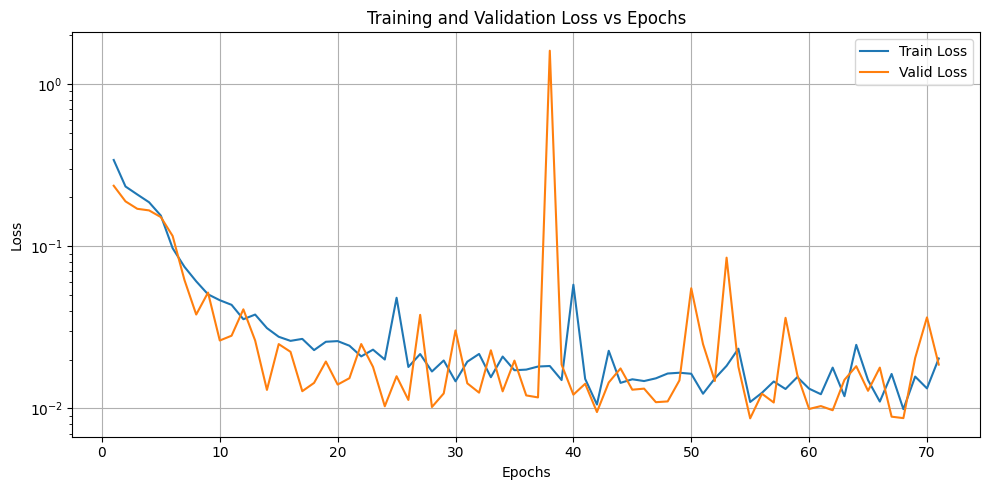

In [18]:
# model = load_model(f"{_exp_name}_best.ckpt")
model, train_losses, valid_losses = try_load_model(_exp_name)
plot_losses(train_losses, valid_losses)

## Evaluation

In [24]:
evaluate_model(model, test_loader)

100%|██████████| 7995/7995 [07:30<00:00, 17.76it/s]

Test Accuracy: 0.6862
F1 Score: 0.6844
F2 Score: 0.6846
AUC: 0.7623


(0.6861788617886179,
 0.6844162475346975,
 0.6845580537243631,
 np.float64(0.7622869478271785))